In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson



# Parameters

In [2]:

lambda_rate = 10  # Average number of phone calls received to a phone per day
T = 1000           # Total Number of Days of Simulation
time_step = 1      #1 day    
num_intervals = 1000  # Total Number of set of 1000 days 



## 1: Creating data to which obeys Poisson Process basic laws 

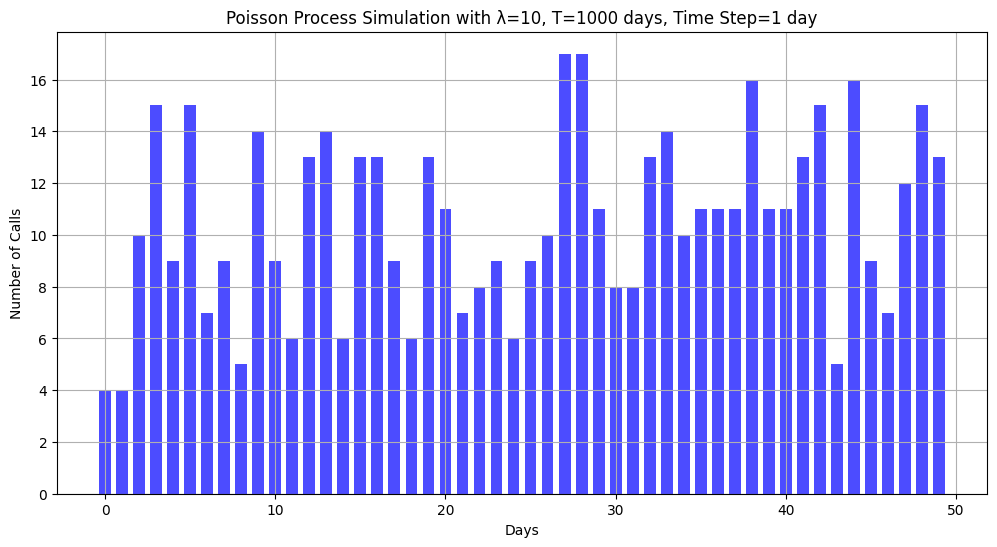

In [3]:


def data_generate(T, lambda_rate, time_step):

    calls_per_day = []

    for t in range(T):
        inter_arrival_times = []
        current_time = 0

        # Simulate inter-arrival times until the day ends
        while current_time < time_step:
            # Generate inter-arrival times using the exponential distribution
            inter_arrival_time = -np.log(np.random.rand()) / lambda_rate
            current_time += inter_arrival_time
            if current_time < time_step:
                inter_arrival_times.append(inter_arrival_time)

        # Count the number of calls/events in the current day
        num_calls = len(inter_arrival_times)
        calls_per_day.append(num_calls)

    return calls_per_day


# Plot the results
calls_per_day = data_generate(50,10, 1)
time_intervals = np.arange(0, 50, time_step)
plt.figure(figsize=(12, 6))
plt.bar(time_intervals, calls_per_day, width=0.7, color='b', alpha=0.7)
plt.xlabel('Days')
plt.ylabel('Number of Calls')
plt.title(f"Poisson Process Simulation with λ={lambda_rate}, T={T} days, Time Step={time_step} day")
plt.grid(True)
plt.show()

# Mean and Variance of Poisson Process

In [4]:
# Here we can also observe that the mean and variance of a poisson process are both equal 
# and equals to the lambda chosen (average number of calls per day)
print("Empirical Mean:", np.mean(calls_per_day))
print("Empirical Variance:", np.var(calls_per_day))


Empirical Mean: 10.56
Empirical Variance: 12.166400000000001


## 2: Theoritical Poisson Distribution (Probability Mass Function)

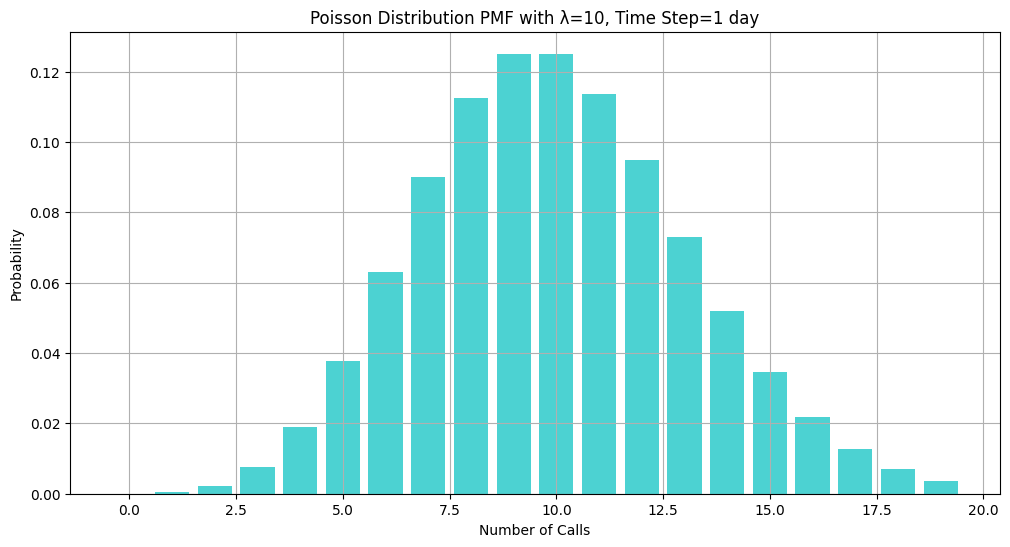

In [5]:
# Simulation 2: Poisson Distribution (Probability Mass Function)
x_values = np.arange(0, 20)  # Possible number of calls per day
poisson_pmf = poisson.pmf(x_values, lambda_rate * time_step)  # PMF for a Poisson distribution

plt.figure(figsize=(12, 6))
plt.bar(x_values, poisson_pmf, color='c', alpha=0.7)
plt.xlabel('Number of Calls')
plt.ylabel('Probability')
plt.title(f"Poisson Distribution PMF with λ={lambda_rate}, Time Step={time_step} day")
plt.grid(True)
plt.show()



## 3: Variations with T (Testing days) - Poisson Distribution (Probability Mass Function)

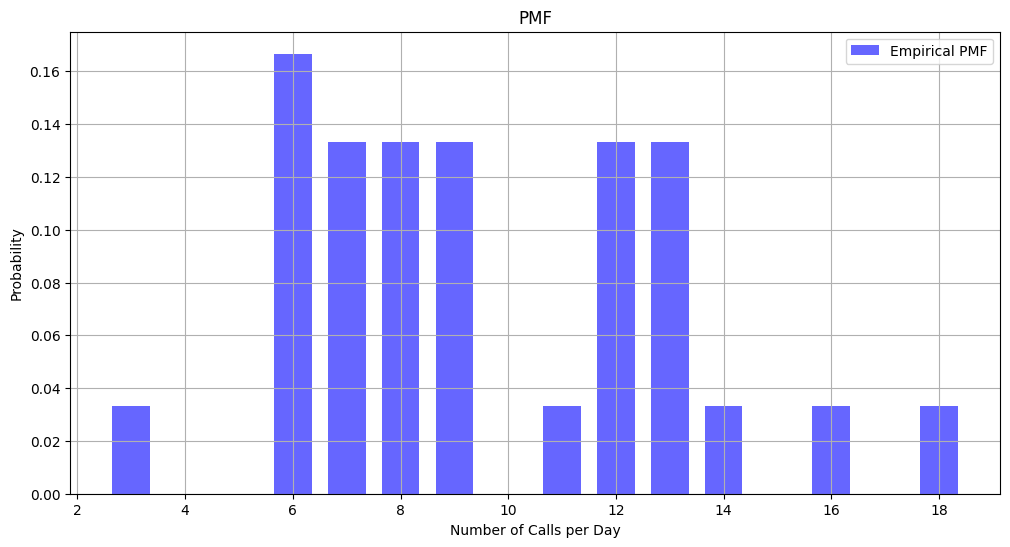

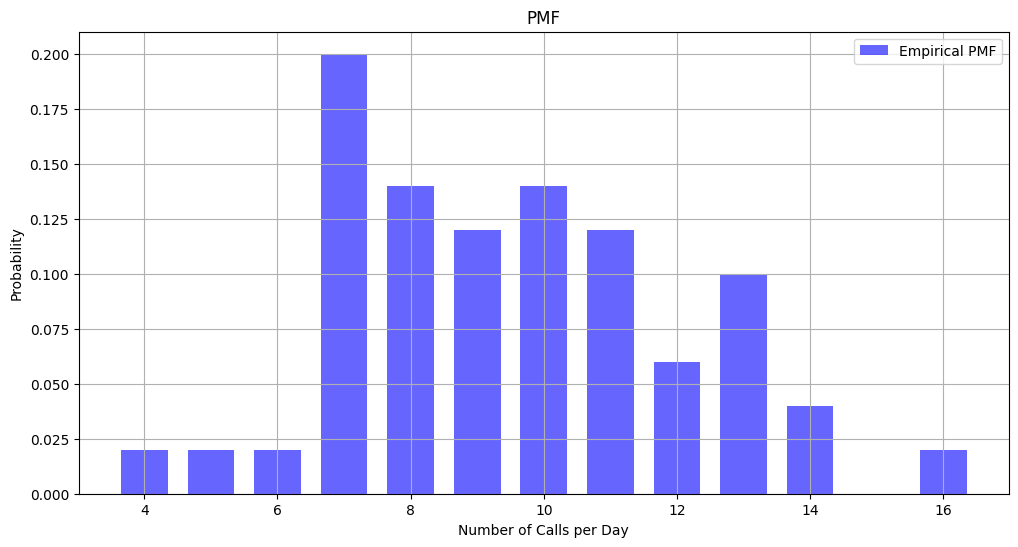

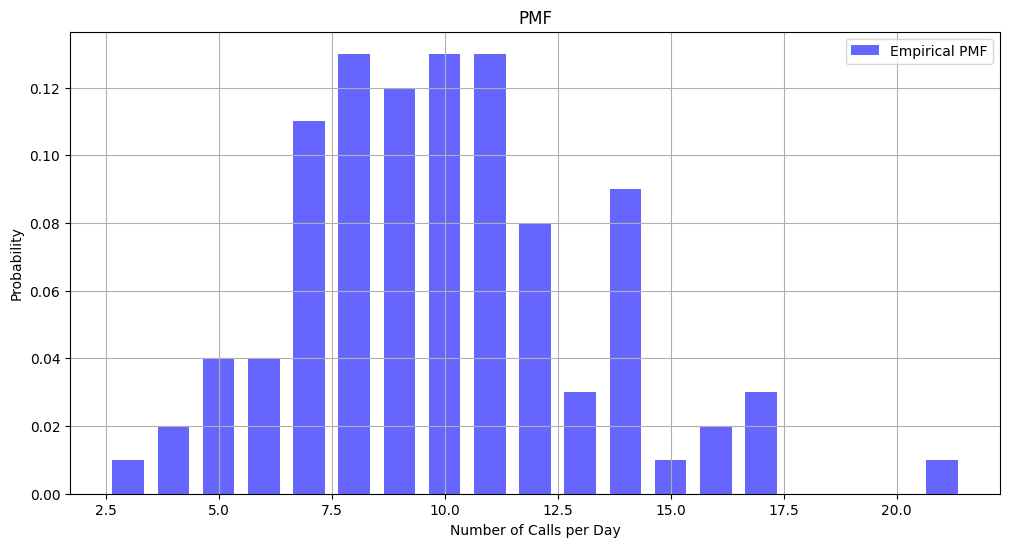

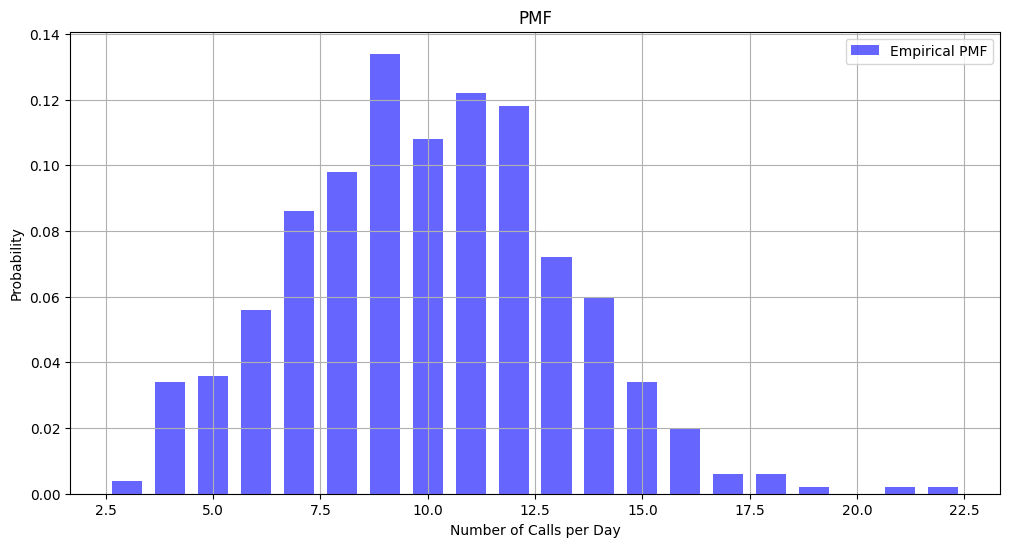

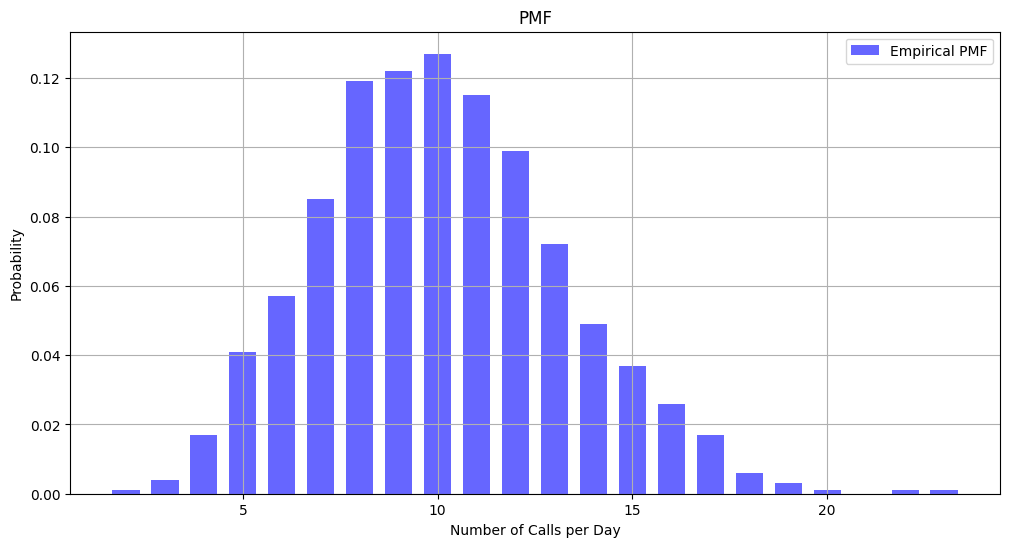

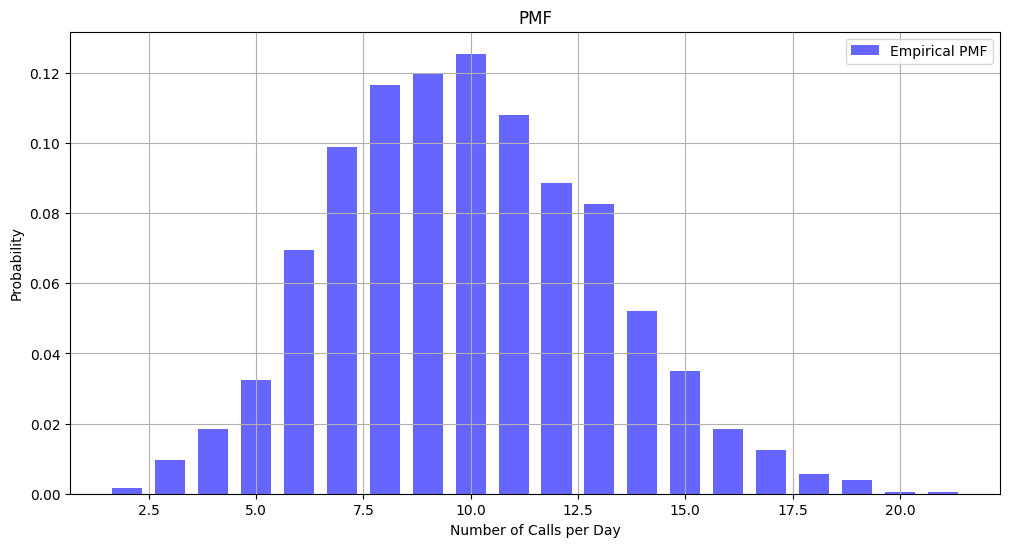

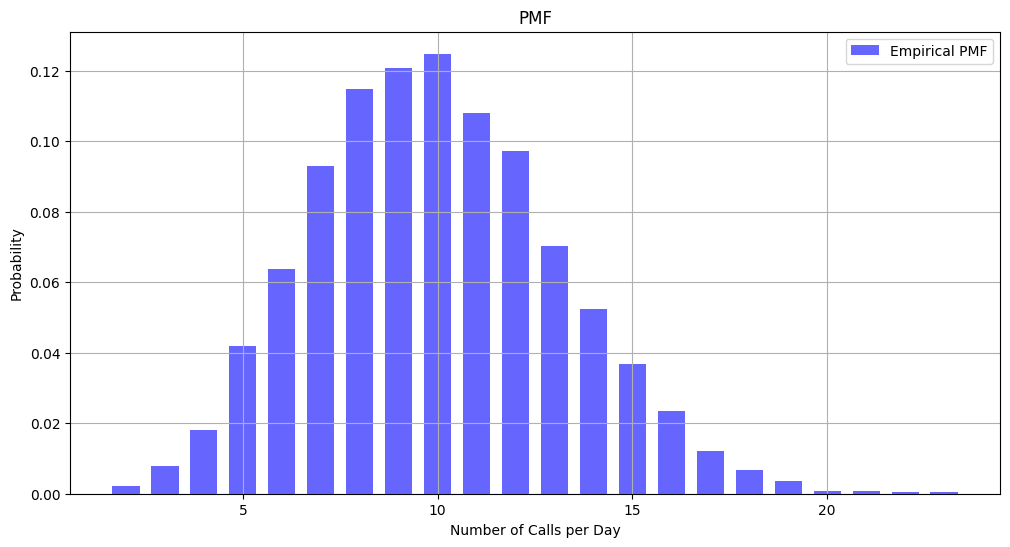

In [6]:

for k in (30, 50,100,500,1000, 2000, 5000):
    calls_per_day = data_generate(k,10, 1)
    unique_calls, counts = np.unique(calls_per_day, return_counts=True)
    pmf_empirical = counts / k  # Normalize to get probabilities

    plt.figure(figsize=(12, 6))
    plt.bar(unique_calls, pmf_empirical, width=0.7, alpha=0.6, label="Empirical PMF", color='b')


    plt.xlabel('Number of Calls per Day')
    plt.ylabel('Probability')
    plt.title('PMF')
    plt.legend()
    plt.grid(True)
    plt.show()

## 4: Variations with λ

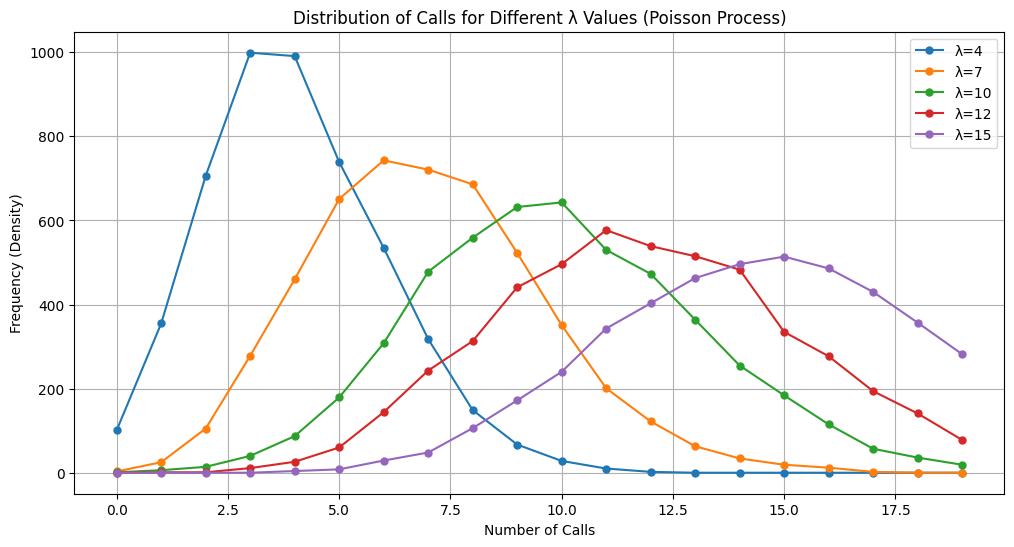

In [7]:

lambdas = [4, 7, 10, 12, 15]
plt.figure(figsize=(12, 6))

for lambda_var in lambdas:
    calls_per_day = data_generate(5000, lambda_var, time_step)
    frequency = [calls_per_day.count(val) for val in x_values]
    plt.plot(x_values, frequency, label=f"λ={lambda_var}", marker='o', linestyle='-', markersize=5)


plt.xlabel('Number of Calls')
plt.ylabel('Frequency (Density)')
plt.title(f'Distribution of Calls for Different λ Values (Poisson Process)')
plt.legend()
plt.grid(True)
plt.show()


## 5: Exponential Distribution of Inter-arrival Times

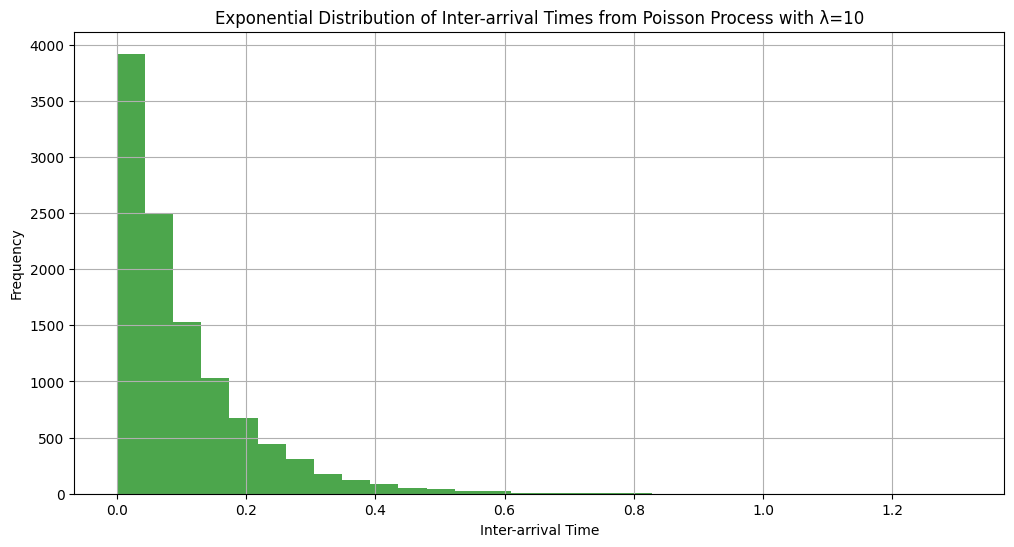

In [8]:

inter_arrival_times = []

for _ in range(T):
    current_time = 0
    while current_time < time_step:
        #inter-arrival time based on the Poisson process theorem
        inter_arrival_time = -np.log(np.random.rand()) / lambda_rate
        current_time += inter_arrival_time
        inter_arrival_times.append(inter_arrival_time)

plt.figure(figsize=(12, 6))
plt.hist(inter_arrival_times, bins=30, color='g', alpha=0.7)
plt.xlabel('Inter-arrival Time')
plt.ylabel('Frequency')
plt.title(f"Exponential Distribution of Inter-arrival Times from Poisson Process with λ={lambda_rate}")
plt.grid(True)
plt.show()


## 6: Total Calls over Multiple Time Intervals

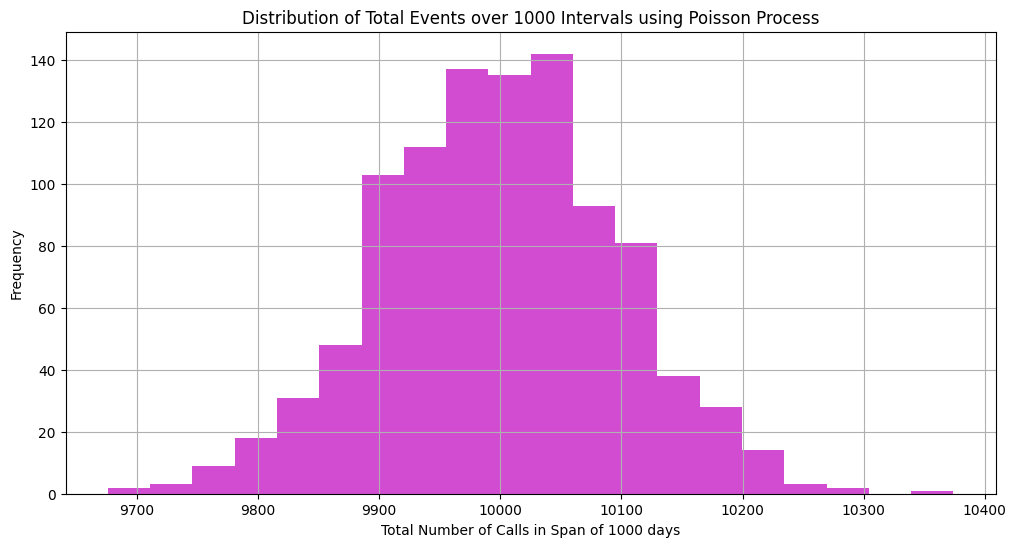

In [9]:
num_intervals = 1000
total_events = []

for _ in range(num_intervals):
    total_events_count = 0
    current_time = 0
    while current_time < T:
        
        inter_arrival_time = -np.log(np.random.rand()) / lambda_rate
        current_time += inter_arrival_time
        if current_time < T:
            total_events_count += 1
    total_events.append(total_events_count)

plt.figure(figsize=(12, 6))
plt.hist(total_events, bins=20, color='m', alpha=0.7)
plt.xlabel(f'Total Number of Calls in Span of {T} days')
plt.ylabel('Frequency')
plt.title(f"Distribution of Total Events over {num_intervals} Intervals using Poisson Process")
plt.grid(True)
plt.show()


## Final Results 

In [10]:
mean_events = np.mean(calls_per_day)
std_events = np.std(calls_per_day)
total_events_simulated = sum(calls_per_day)
print(f"Simulated Event Data for λ={lambda_rate}, T={T}, Time Step={time_step} day:")
print(f"Mean : {mean_events}")
print(f"Standard Deviation: {std_events}")
print(f"Variance: {std_events*std_events}")



Simulated Event Data for λ=10, T=1000, Time Step=1 day:
Mean : 14.9808
Standard Deviation: 3.8753620940500513
Variance: 15.01843136
